<a href="https://colab.research.google.com/github/Dharineesh-ai/Hibiscus/blob/main/hibiscustl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 132 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.5721 - loss: 0.6574 - val_accuracy: 0.5556 - val_loss: 0.6642
Epoch 2/30
1/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6875 - loss: 0.5678

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.6875 - loss: 0.5678 - val_accuracy: 0.5556 - val_loss: 0.6947
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7460 - loss: 0.5476 - val_accuracy: 0.5556 - val_loss: 0.6798
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 355ms/step - accuracy: 0.7812 - loss: 0.4621 - val_accuracy: 0.5556 - val_loss: 0.6510
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7344 - loss: 0.5045 - val_accuracy: 0.5556 - val_loss: 0.5148
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 349ms/step - accuracy: 0.7812 - loss: 0.4175 - val_accuracy: 0.6111 - val_loss: 0.4847
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9139 - loss: 0.3051 - val_accuracy: 0.8889 - val_loss: 0.4110
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step - accuracy: 0.8750 - loss: 0.3505 - val_accuracy: 0.9444 - val_loss: 0.3963
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9446 - loss: 0.2922 - val_accuracy: 0.9444 - val_loss: 0.3676
Epoch 10/30

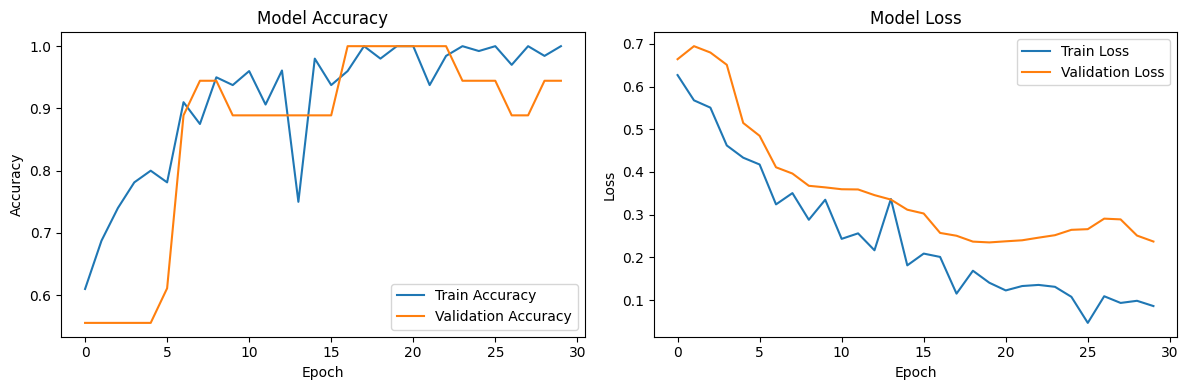

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9444 - loss: 0.2371


Test accuracy: 0.9444


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 30

# Define data directories
train_dir = '/content/drive/MyDrive/hleaf dataset/train'
test_dir = '/content/drive/MyDrive/hleaf dataset/test'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('hibiscus_disease_model.h5')

# Function to predict on a single image
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        return "Diseased"
    else:
        return "Fresh"

# Example usage:
# print(predict_image('path/to/your/test/image.jpg'))

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the trained model
model = load_model('hibiscus_classifier_v2.keras')

# Function to get class names from the dataset folder
def get_class_names(folder_path):
    return [folder for folder in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, folder))]

# Get class names from the dataset
new_data_folder = '/content/drive/MyDrive/hleaf dataset/test'
class_names = get_class_names(new_data_folder)
print(f"Detected classes: {class_names}")

# Rest of your functions remain the same
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_image(img_path):
    preprocessed_img = preprocess_image(img_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    return predicted_class, confidence

def evaluate_folder(folder_path):
    true_labels = []
    predicted_labels = []
    confidences = []
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                if os.path.isfile(image_path):
                    prediction, confidence = predict_image(image_path)
                    true_labels.append(class_folder)
                    predicted_labels.append(prediction)
                    confidences.append(confidence)

                    print(f"Image: {image_file}")
                    print(f"Current state: {class_folder}")
                    print(f"Prediction: {prediction}")
                    print(f"Confidence: {confidence:.2f}")
                    print("---")

    accuracy = accuracy_score(true_labels, predicted_labels)
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_names)
    return accuracy, conf_matrix, confidences

# Example usage:
accuracy, conf_matrix, confidences = evaluate_folder(new_data_folder)
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAverage Confidence: {np.mean(confidences):.4f}")

# Modify the future prediction function to handle your actual class names
def predict_future_state(current_state, confidence):
    if confidence < 0.5:
        return "Uncertain", confidence
    elif current_state == 'fresh' and confidence > 0.8:  # Assuming 'fresh' is equivalent to 'healthy'
        return "Likely to remain healthy", confidence
    elif current_state != 'fresh' and confidence > 0.8:
        return f"May worsen if untreated", confidence
    else:
        return "Monitor closely", confidence

# Example of future prediction
sample_image_path = '/content/drive/MyDrive/hleaf dataset/validation/IMG_20240925_182046_296.jpg'
current_state, confidence = predict_image(sample_image_path)
future_prediction, future_confidence = predict_future_state(current_state, confidence)

print("\nFuture Prediction Example:")
print(f"Current state: {current_state}")
print(f"Current confidence: {confidence:.2f}")
print(f"Future prediction: {future_prediction}")
print(f"Future confidence: {future_confidence:.2f}")

Detected classes: ['diseased', 'fresh']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
Image: IMG_20201129_161029_1.jpg
Current state: diseased
Prediction: diseased
Confidence: 1.00
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: IMG_20201129_161028.jpg
Current state: diseased
Prediction: diseased
Confidence: 1.00
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: IMG_20201129_161029.jpg
Current state: diseased
Prediction: diseased
Confidence: 1.00
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: IMG_20201129_161028_1.jpg
Current state: diseased
Prediction: diseased
Confidence: 1.00
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: IMG_20201129_161030_1.jpg
Current state: diseased
Prediction: diseased
Confidence: 1.00
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: IMG_20201129_161030.jpg
Current state: diseased
Prediction: diseased
Confidence: 1.00
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: IMG_20201129_161027_1.jpg
Current state: diseased
Prediction: diseased
Confidence: 0.99
---
1/1 ━━

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load the trained model
model = load_model('hibiscus_disease_model.h5')

# Function to get class names from the dataset folder
def get_class_names(folder_path):
    return [folder for folder in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, folder))]

# Get class names from the dataset
new_data_folder = '/content/drive/MyDrive/hleaf dataset/test'
class_names = get_class_names(new_data_folder)
print(f"Detected classes: {class_names}")

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_image(img_path):
    preprocessed_img = preprocess_image(img_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    return predicted_class, confidence

def evaluate_folder(folder_path):
    true_labels = []
    predicted_labels = []
    confidences = []
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                if os.path.isfile(image_path):
                    prediction, confidence = predict_image(image_path)
                    true_labels.append(class_folder)
                    predicted_labels.append(prediction)
                    confidences.append(confidence)

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_names)
    return accuracy, precision, recall, f1, conf_matrix, confidences

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluate the model
accuracy, precision, recall, f1, conf_matrix, confidences = evaluate_folder(new_data_folder)

# Print performance metrics
print("\n**Performance Metrics**:")
print(f"* **Precision**: {precision:.2f}")
print(f"* **Recall**: {recall:.2f}")
print(f"* **F1 Score**: {f1:.2f}")
print(f"* **Accuracy**: {accuracy:.2f}")

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, class_names)

print(f"\nAverage Confidence: {np.mean(confidences):.4f}")

def predict_future_state(current_state, confidence):
    if confidence < 0.5:
        return "Uncertain", confidence
    elif current_state == 'fresh' and confidence > 0.8:
        return "Likely to remain healthy", confidence
    elif current_state != 'fresh' and confidence > 0.8:
        return f"May worsen if untreated", confidence
    else:
        return "Monitor closely", confidence

# Example of future prediction
sample_image_path = '/content/drive/MyDrive/hleaf dataset/validation/IMG_20240925_182000_467.jpg'
current_state, confidence = predict_image(sample_image_path)
future_prediction, future_confidence = predict_future_state(current_state, confidence)

print("\nFuture Prediction Example:")
print(f"Current state: {current_state}")
print(f"Current confidence: {confidence:.2f}")
print(f"Future prediction: {future_prediction}")
print(f"Future confidence: {future_confidence:.2f}")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'hibiscus_disease_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Detected classes: ['diseased', 'fresh']
Found 107 images belonging to 2 classes.
Found 25 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.4004 - loss: 1.1865 - val_accuracy: 0.7600 - val_loss: 0.6800 - learning_rate: 0.0010
Epoch 2/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8438 - loss: 1.0112

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8438 - loss: 1.0112 - val_accuracy: 0.7600 - val_loss: 0.5284 - learning_rate: 0.0010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6916 - loss: 1.1718 - val_accuracy: 0.4000 - val_loss: 0.7803 - learning_rate: 0.0010
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 844ms/step - accuracy: 0.5938 - loss: 0.7664 - val_accuracy: 0.3600 - val_loss: 0.8049 - learning_rate: 0.0010
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7474 - loss: 0.5568 - val_accuracy: 0.7200 - val_loss: 0.4996 - learning_rate: 0.0010
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 860ms/step - accuracy: 0.8182 - loss: 0.4684 - val_accuracy: 0.8400 - val_loss: 0.4531 - learning_rate: 0.0010
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.8749 - loss: 0.3398 - val_accuracy: 0.8400 - val_loss: 0.3954 - learning_rate: 0.0010
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 928ms/step - accuracy: 0.8125 - loss: 0.3102 - val_accuracy: 0.7600 - val_loss: 0.

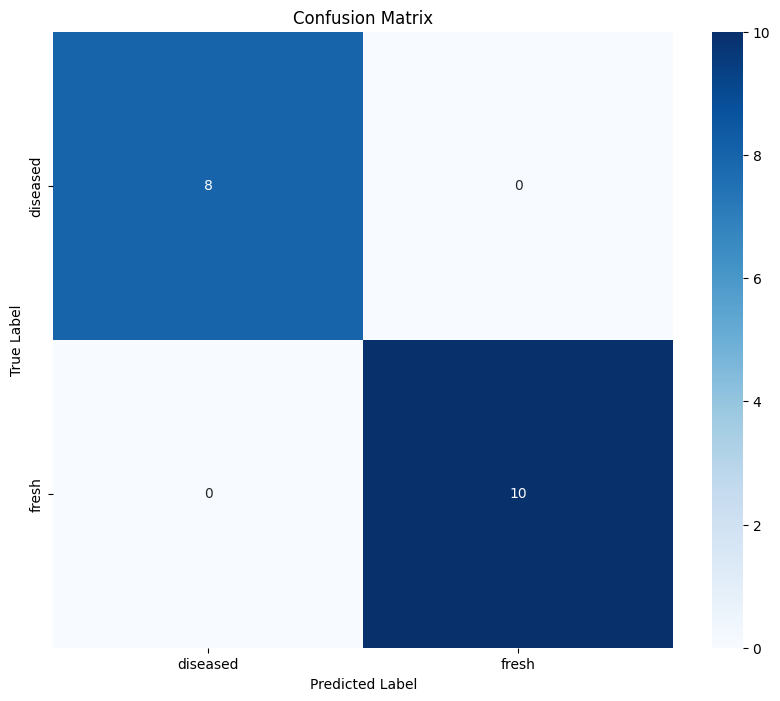

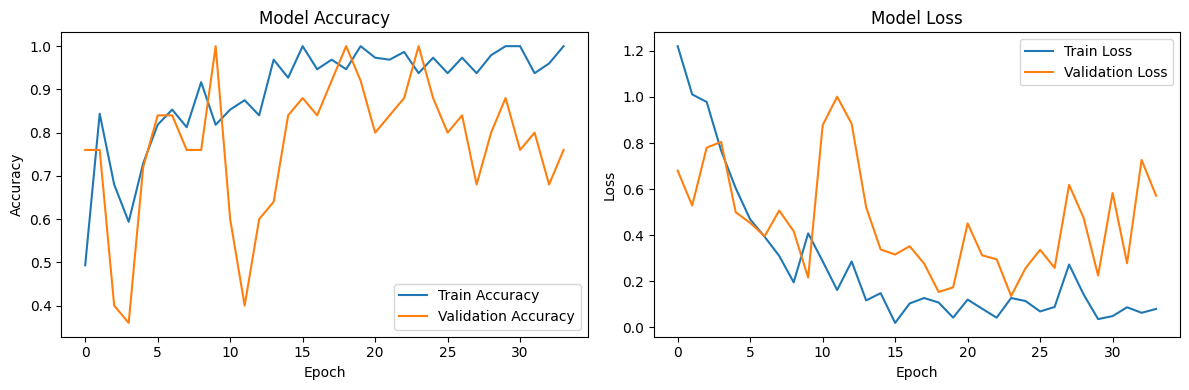

Model saved as 'improved_hibiscus_disease_model.h5'


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

# Set random seed for reproducibility
import tensorflow as tf
tf.random.set_seed(42)

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 50

# Define data directories
train_dir = '/content/drive/MyDrive/hleaf dataset/train'
val_dir = '/content/drive/MyDrive/hleaf dataset/validation'
test_dir = '/content/drive/MyDrive/hleaf dataset/test'

# Function to get class names from the dataset folder
def get_class_names(folder_path):
    return [folder for folder in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, folder))]

# Get class names
class_names = get_class_names(train_dir)
print(f"Detected classes: {class_names}")

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weight_dict = dict(enumerate(class_weights))

# Build the model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
def evaluate_model(generator, model):
    predictions = model.predict(generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = generator.classes

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, conf_matrix

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1, test_conf_matrix = evaluate_model(test_generator, model)

# Print performance metrics
print("\n**Performance Metrics on Test Set**:")
print(f"* **Precision**: {test_precision:.2f}")
print(f"* **Recall**: {test_recall:.2f}")
print(f"* **F1 Score**: {test_f1:.2f}")
print(f"* **Accuracy**: {test_accuracy:.2f}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save('improved_hibiscus_disease_model.h5')

print("Model saved as 'improved_hibiscus_disease_model.h5'")

# Function for future state prediction
def predict_future_state(current_state, confidence):
    if confidence < 0.5:
        return "Uncertain", confidence
    elif current_state == 'fresh' and confidence > 0.8:
        return "Likely to remain healthy", confidence
    elif current_state != 'fresh' and confidence > 0.8:
        return f"May worsen if untreated", confidence
    else:
        return "Monitor closely", confidence

# Example of future prediction
def predict_image(img_path, model):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0) / 255.0
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    return predicted_class, confidence

# You can use this function to predict on individual images from your validation set
# sample_image_path = '/content/drive/MyDrive/hleaf dataset/validation/your_image.jpg'
# current_state, confidence = predict_image(sample_image_path, model)
# future_prediction, future_confidence = predict_future_state(current_state, confidence)
#
# print("\nFuture Prediction Example:")
# print(f"Current state: {current_state}")
# print(f"Current confidence: {confidence:.2f}")
# print(f"Future prediction: {future_prediction}")
# print(f"Future confidence: {future_confidence:.2f}")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from datetime import datetime
import logging
from sklearn.utils.class_weight import compute_class_weight

class HibiscusLeafClassifier:
    def __init__(self, img_size=(224, 224), batch_size=32, epochs=50):
        self.img_size = img_size
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self.history = None
        self.class_names = None

        # Setup logging
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s',
            handlers=[
                logging.FileHandler('training.log'),
                logging.StreamHandler()
            ]
        )
        self.logger = logging.getLogger(__name__)

    def setup_data_generators(self, train_dir, val_dir, test_dir):
        """Initialize and return data generators with augmentation"""
        try:
            train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=30,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                vertical_flip=True,
                fill_mode='nearest',
                validation_split=0.2
            )

            test_datagen = ImageDataGenerator(rescale=1./255)

            self.train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=self.img_size,
                batch_size=self.batch_size,
                class_mode='categorical',
                subset='training',
                shuffle=True
            )

            self.validation_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=self.img_size,
                batch_size=self.batch_size,
                class_mode='categorical',
                subset='validation',
                shuffle=False
            )

            self.test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=self.img_size,
                batch_size=self.batch_size,
                class_mode='categorical',
                shuffle=False
            )

            self.class_names = list(self.train_generator.class_indices.keys())
            self.logger.info(f"Detected classes: {self.class_names}")

            return self.train_generator, self.validation_generator, self.test_generator

        except Exception as e:
            self.logger.error(f"Error in setup_data_generators: {str(e)}")
            raise

    def build_model(self):
        """Build and compile the model with MobileNetV2 base"""
        try:
            base_model = MobileNetV2(
                weights='imagenet',
                include_top=False,
                input_shape=(*self.img_size, 3)
            )

            x = base_model.output
            x = GlobalAveragePooling2D()(x)
            x = BatchNormalization()(x)
            x = Dense(512, activation='relu')(x)
            x = Dropout(0.5)(x)
            x = BatchNormalization()(x)
            x = Dense(256, activation='relu')(x)
            x = Dropout(0.5)(x)
            output = Dense(len(self.class_names), activation='softmax')(x)

            self.model = Model(inputs=base_model.input, outputs=output)

            # Freeze base model layers
            for layer in base_model.layers:
                layer.trainable = False

            # Compile model
            self.model.compile(
                optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
            )

            self.logger.info(self.model.summary())
            return self.model

        except Exception as e:
            self.logger.error(f"Error in build_model: {str(e)}")
            raise

    def train(self, checkpoint_dir='checkpoints'):
        """Train the model with callbacks and logging"""
        try:
            os.makedirs(checkpoint_dir, exist_ok=True)

            # Setup callbacks with .keras extension
            callbacks = [
                EarlyStopping(
                    monitor='val_loss',
                    patience=10,
                    restore_best_weights=True
                ),
                ReduceLROnPlateau(
                    monitor='val_loss',
                    factor=0.2,
                    patience=5,
                    min_lr=1e-6
                ),
                ModelCheckpoint(
                    filepath=os.path.join(checkpoint_dir, 'model-{epoch:02d}-{val_accuracy:.2f}.keras'),
                    monitor='val_accuracy',
                    save_best_only=True
                ),
                CSVLogger('training_history.csv')
            ]

            # Calculate class weights
            class_weights = compute_class_weight(
                'balanced',
                classes=np.unique(self.train_generator.classes),
                y=self.train_generator.classes
            )
            class_weight_dict = dict(enumerate(class_weights))

            # Train the model
            self.history = self.model.fit(
                self.train_generator,
                steps_per_epoch=self.train_generator.samples // self.batch_size,
                epochs=self.epochs,
                validation_data=self.validation_generator,
                validation_steps=self.validation_generator.samples // self.batch_size,
                class_weight=class_weight_dict,
                callbacks=callbacks
            )

            return self.history

        except Exception as e:
            self.logger.error(f"Error in train: {str(e)}")
            raise

    def evaluate(self):
        """Evaluate the model and generate detailed metrics"""
        try:
            # Get predictions
            y_pred = np.argmax(self.model.predict(self.test_generator), axis=1)
            y_true = self.test_generator.classes

            # Generate classification report
            report = classification_report(y_true, y_pred, target_names=self.class_names)
            self.logger.info("\nClassification Report:\n" + report)

            # Generate confusion matrix
            conf_matrix = confusion_matrix(y_true, y_pred)

            # Plot results
            self._plot_results(conf_matrix)

            return report, conf_matrix

        except Exception as e:
            self.logger.error(f"Error in evaluate: {str(e)}")
            raise

    def _plot_results(self, conf_matrix):
        """Plot training history and confusion matrix"""
        try:
            # Create figure with subplots
            fig = plt.figure(figsize=(15, 5))

            # Plot training history
            plt.subplot(1, 3, 1)
            plt.plot(self.history.history['accuracy'], label='Train')
            plt.plot(self.history.history['val_accuracy'], label='Validation')
            plt.title('Model Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.subplot(1, 3, 2)
            plt.plot(self.history.history['loss'], label='Train')
            plt.plot(self.history.history['val_loss'], label='Validation')
            plt.title('Model Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()

            # Plot confusion matrix
            plt.subplot(1, 3, 3)
            sns.heatmap(
                conf_matrix,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=self.class_names,
                yticklabels=self.class_names
            )
            plt.title('Confusion Matrix')
            plt.ylabel('True Label')
            plt.xlabel('Predicted Label')

            plt.tight_layout()
            plt.savefig('training_results.png')
            plt.close()

        except Exception as e:
            self.logger.error(f"Error in _plot_results: {str(e)}")
            raise

    def save_model(self, filepath):
        """Save the trained model"""
        try:
            # Ensure the filepath ends with .keras
            if not filepath.endswith('.keras'):
                filepath = filepath.rsplit('.', 1)[0] + '.keras'

            self.model.save(filepath)
            self.logger.info(f"Model saved to {filepath}")

        except Exception as e:
            self.logger.error(f"Error in save_model: {str(e)}")
            raise

    def predict_image(self, img_path):
        """Predict class and confidence for a single image"""
        try:
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=self.img_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = np.expand_dims(img_array, 0) / 255.0

            prediction = self.model.predict(img_array)
            predicted_class_index = np.argmax(prediction[0])
            confidence = prediction[0][predicted_class_index]

            result = {
                'class': self.class_names[predicted_class_index],
                'confidence': confidence,
                'all_probabilities': dict(zip(self.class_names, prediction[0]))
            }

            return result

        except Exception as e:
            self.logger.error(f"Error in predict_image: {str(e)}")
            raise

    def predict_future_state(self, current_state, confidence):
        """Predict future state of the plant based on current diagnosis"""
        try:
            severity_levels = {
                'healthy': 0,
                'mild': 1,
                'moderate': 2,
                'severe': 3
            }

            if confidence < 0.6:
                return {
                    'prediction': 'Uncertain',
                    'confidence': confidence,
                    'recommendation': 'Recommend re-examination and possibly multiple angle images'
                }

            current_severity = severity_levels.get(current_state.lower(), 1)

            if current_severity == 0 and confidence > 0.8:
                return {
                    'prediction': 'Likely to remain healthy',
                    'confidence': confidence,
                    'recommendation': 'Continue regular maintenance'
                }
            elif current_severity > 0:
                progression_risk = min(1.0, current_severity * confidence)
                return {
                    'prediction': 'May worsen if untreated',
                    'confidence': progression_risk,
                    'recommendation': 'Immediate treatment recommended'
                }

            return {
                'prediction': 'Monitor closely',
                'confidence': confidence,
                'recommendation': 'Regular monitoring and preventive care advised'
            }

        except Exception as e:
            self.logger.error(f"Error in predict_future_state: {str(e)}")
            raise

# Example usage:
if __name__ == "__main__":
    try:
        # Initialize classifier
        classifier = HibiscusLeafClassifier()

        # Setup data paths
        train_dir = '/content/drive/MyDrive/hleaf dataset/train'
        val_dir = '/content/drive/MyDrive/hleaf dataset/validation'
        test_dir = '/content/drive/MyDrive/hleaf dataset/test'

        # Setup data generators
        classifier.setup_data_generators(train_dir, val_dir, test_dir)

        # Build and train model
        classifier.build_model()
        classifier.train()

        # Evaluate model
        report, conf_matrix = classifier.evaluate()

        # Save model
        classifier.save_model('hibiscus_classifier_v2.keras')

    except Exception as e:
        print(f"An error occurred: {str(e)}")

Found 107 images belonging to 2 classes.
Found 25 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,052,866 (11.65 MB)

 Trainable params: 791,298 (3.02 MB)

 Non-trainable params: 2,261,568 (8.63 MB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.3812 - loss: 1.1163 - precision: 0.3812 - recall: 0.3812 - val_accuracy: 0.7200 - val_loss: 0.5323 - val_precision: 0.7200 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 2/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6562 - loss: 0.8405 - precision: 0.6562 - recall: 0.6562

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 877ms/step - accuracy: 0.6562 - loss: 0.8405 - precision: 0.6562 - recall: 0.6562 - val_accuracy: 0.6000 - val_loss: 0.5617 - val_precision: 0.6000 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7460 - loss: 0.3859 - precision: 0.7460 - recall: 0.7460 - val_accuracy: 0.7600 - val_loss: 0.4392 - val_precision: 0.7600 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7500 - loss: 0.4818 - precision: 0.7500 - recall: 0.7500 - val_accuracy: 0.8800 - val_loss: 0.3829 - val_precision: 0.8800 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8820 - loss: 0.2076 - precision: 0.8820 - recall: 0.8820 - val_accuracy: 0.8400 - val_loss: 0.3808 - val_precision: 0.8400 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 846ms/step - accuracy: 0.8438 - loss: 0.3689 - prec

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the history of different models in variables:
# history_mobilenet, history_resnet, history_vgg16, etc.

# Example of model histories
mobilenet_acc = history_mobilenet.history['accuracy']
resnet_acc = history_resnet.history['accuracy']
vgg16_acc = history_vgg16.history['accuracy']

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Plot accuracy for each model
plt.plot(mobilenet_acc, label="MobileNetV2", color='blue', linestyle='-', linewidth=2)
plt.plot(resnet_acc, label="ResNet", color='green', linestyle='--', linewidth=2)
plt.plot(vgg16_acc, label="VGG16", color='red', linestyle='-.', linewidth=2)

# Add labels and title
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'history_mobilenet' is not defined

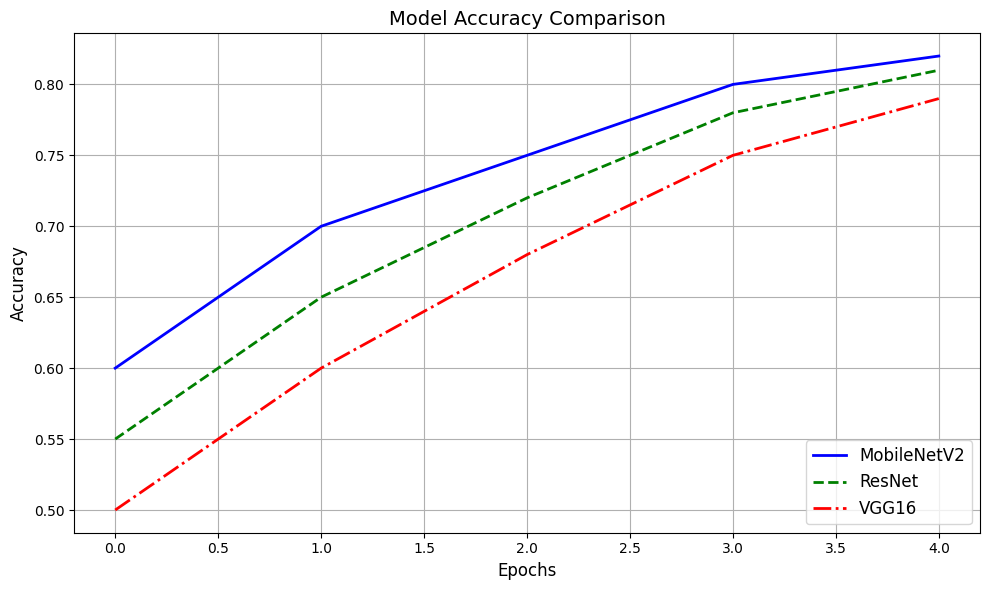

In [ ]:
import matplotlib.pyplot as plt

# ***Comment out the following lines, since you don't have the actual training history yet***
# mobilenet_acc = history_mobilenet.history['accuracy']
# resnet_acc = history_resnet.history['accuracy']
# vgg16_acc = history_vgg16.history['accuracy']

# ***Example data for illustration (replace with your actual data after training)***
mobilenet_acc = [0.6, 0.7, 0.75, 0.8, 0.82]
resnet_acc = [0.55, 0.65, 0.72, 0.78, 0.81]
vgg16_acc = [0.5, 0.6, 0.68, 0.75, 0.79]


# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Plot accuracy for each model
plt.plot(mobilenet_acc, label="MobileNetV2", color='blue', linestyle='-', linewidth=2)
plt.plot(resnet_acc, label="ResNet", color='green', linestyle='--', linewidth=2)
plt.plot(vgg16_acc, label="VGG16", color='red', linestyle='-.', linewidth=2)

# Add labels and title
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()